# 1. Data expoloration


In [2]:
import time, matplotlib, sklearn

# visualizatoin 
import matplotlib.pyplot as plt 

# data wrangling
import pandas as pd
import numpy as np 
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# learning
from sklearn.linear_model import LogisticRegression

# the data intro has been tested with the following versions
print("pandas        Tested version: 2.0.3   Your version: %s" % pd.__version__)
print("numpy         Tested version: 1.21.5  Your version: %s" % np.__version__)
print("matplotlib    Tested version: 3.5.3   Your version: %s" % matplotlib.__version__)
print("scikit-learn  Tested version: 1.2.2   Your version: %s" % sklearn.__version__)

pandas        Tested version: 2.0.3   Your version: 1.2.2
numpy         Tested version: 1.21.5  Your version: 1.18.5
matplotlib    Tested version: 3.5.3   Your version: 3.3.3
scikit-learn  Tested version: 1.2.2   Your version: 1.3.0


In [3]:
# description
description = pd.read_csv('data/WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('data/training_v2.csv')

df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

In [4]:
# Check the data set for missing values
print(df.info())

# Descriptive statistics for each variable in the statistical data set
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
None
        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818  

## 1.1 Missing vales statistics

Missing value statistics：
                               Missing Values Percentage
encounter_id                                0      0.00%
patient_id                                  0      0.00%
hospital_id                                 0      0.00%
hospital_death                              0      0.00%
age                                      4228      4.61%
bmi                                      3429      3.74%
elective_surgery                            0      0.00%
ethnicity                                1395      1.52%
gender                                     25      0.03%
height                                   1334      1.45%
hospital_admit_source                   21409     23.34%
icu_admit_source                          112      0.12%
icu_id                                      0      0.00%
icu_stay_type                               0      0.00%
icu_type                                    0      0.00%
pre_icu_los_days                            0      0.00%
readm

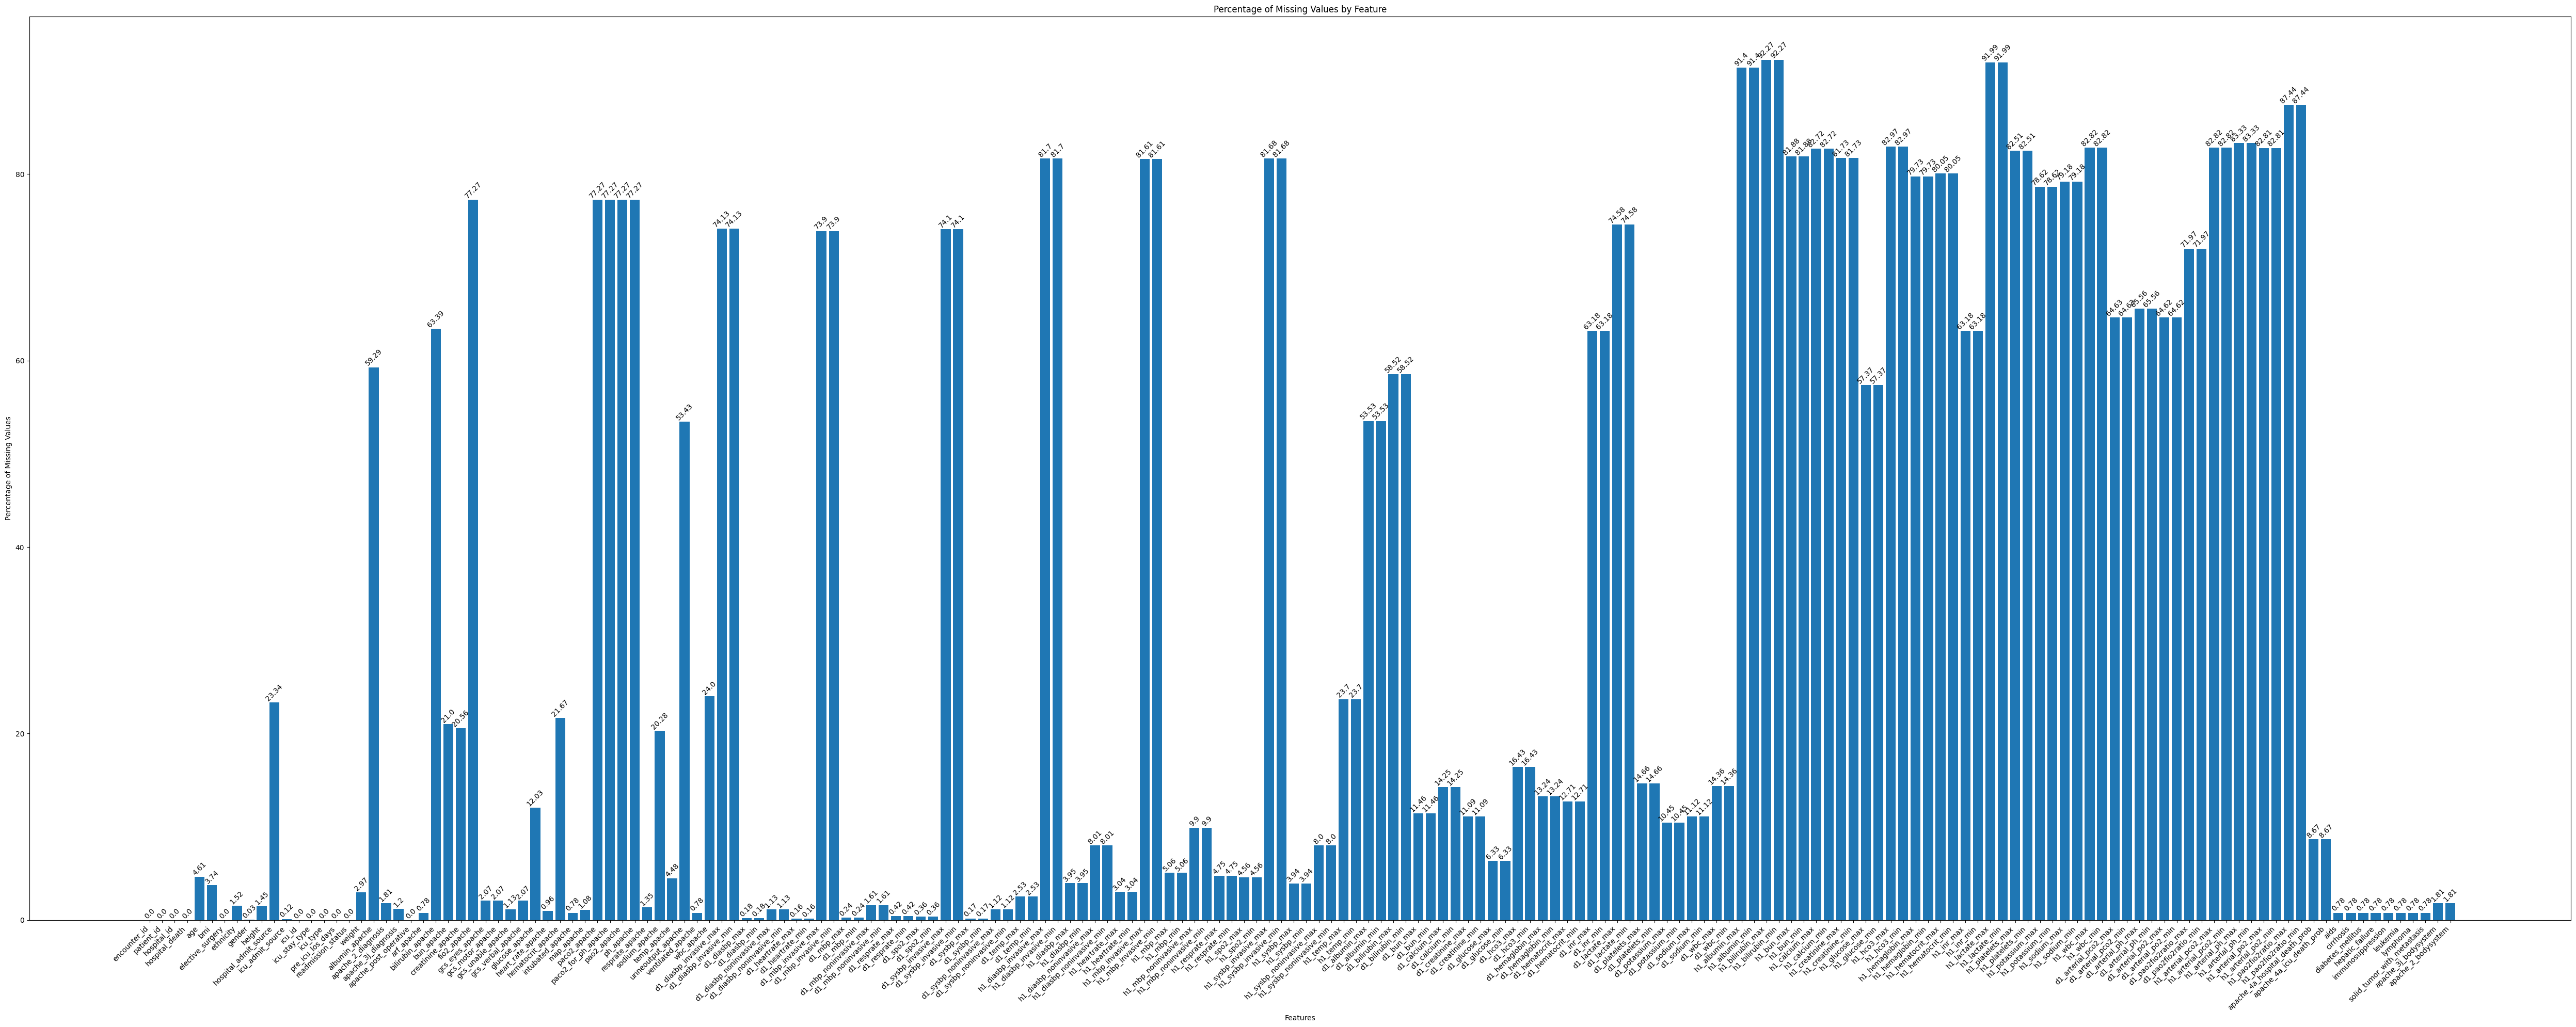

In [5]:
# Missing values
# Check the data set for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Calculate the proportion of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a DataFrame that contains missing value statistics
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics：")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(missing_data_info)

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  # figure size
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  # Prevent label overlap
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, percentage, ha='center', va='bottom', rotation=45)
plt.show()




## 1.2 Data distribution

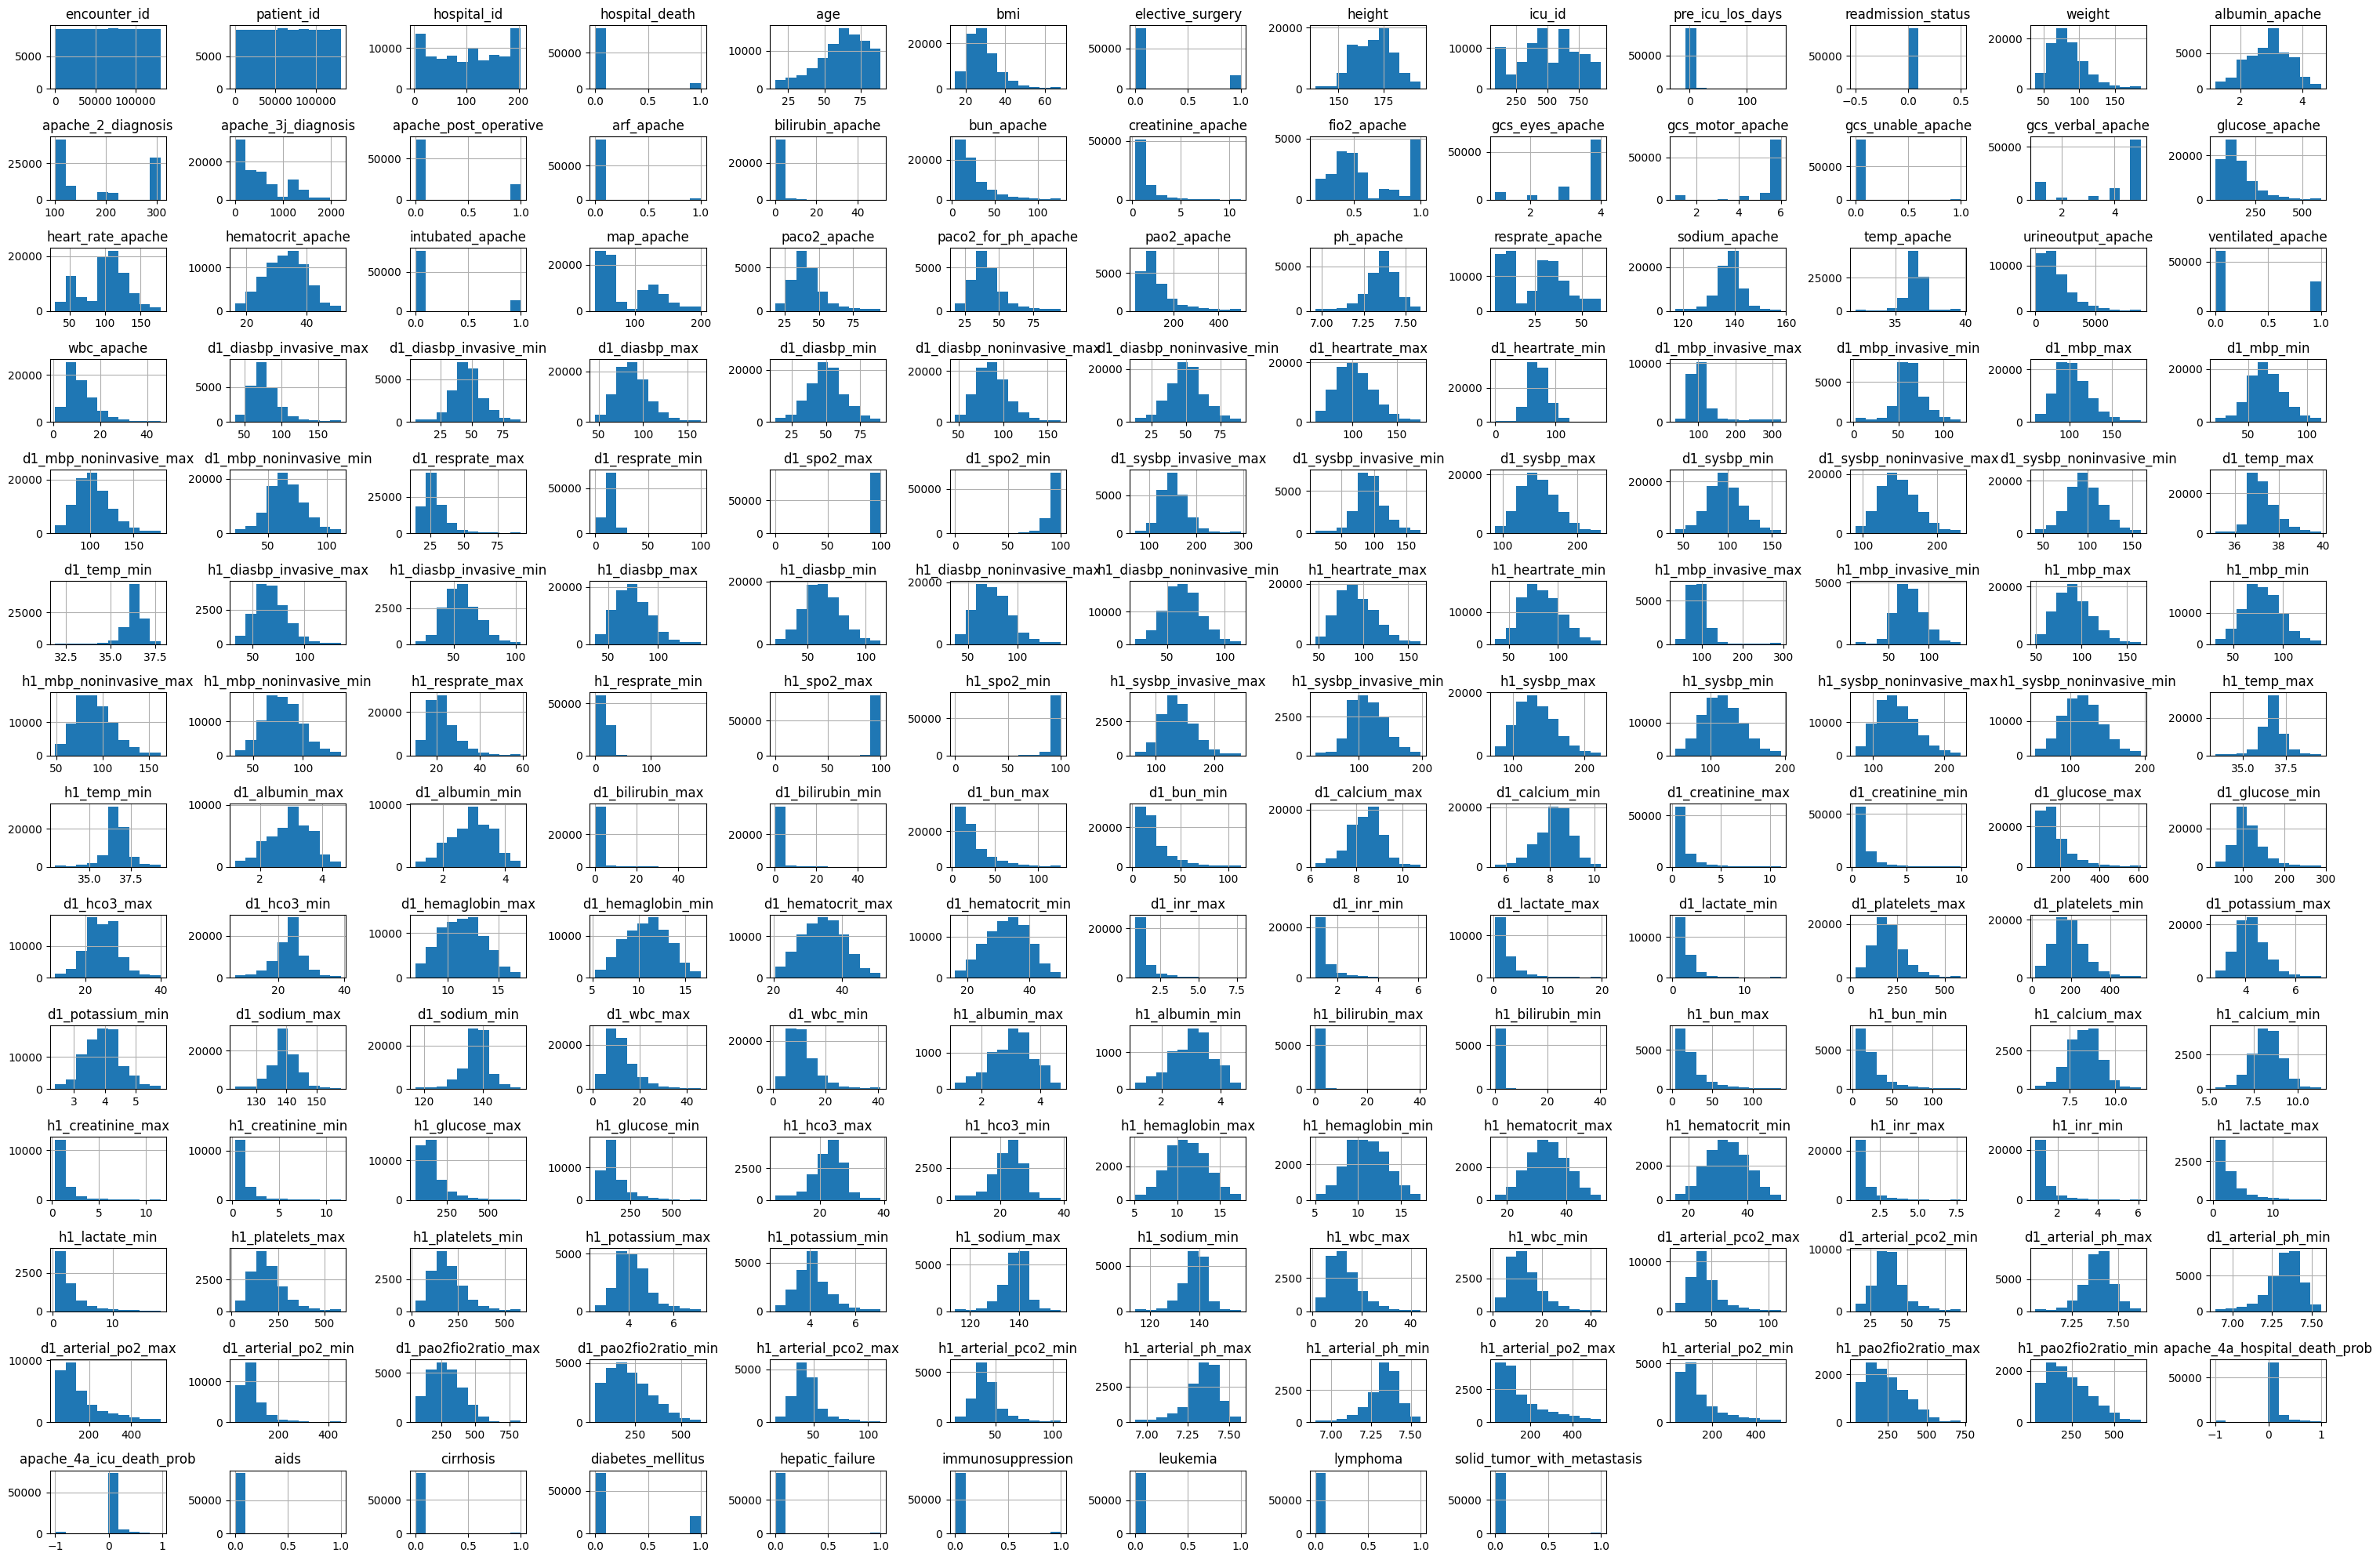

In [6]:
# Histogram of data distribution
df.hist(figsize=(30, 20))
plt.tight_layout()
plt.show()


## 1.3 Pairwise correlations

In [9]:
# Calculate the correlation coefficient matrix
selected_variables = df.columns[:186] 
correlation_matrix = df[selected_variables].corr()
print(correlation_matrix)
# Heatmap visualization
plt.figure(figsize=(80, 70))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

                               encounter_id  patient_id  hospital_id  \
encounter_id                       1.000000   -0.009575    -0.004532   
patient_id                        -0.009575    1.000000    -0.007075   
hospital_id                       -0.004532   -0.007075     1.000000   
hospital_death                    -0.005243    0.004877    -0.001255   
age                               -0.003990    0.006343    -0.008673   
bmi                               -0.001068   -0.001380     0.012874   
elective_surgery                   0.002036    0.001387     0.052123   
height                            -0.005400    0.002902     0.027895   
icu_id                            -0.000992   -0.001770     0.004526   
pre_icu_los_days                  -0.000570   -0.004412    -0.001285   
readmission_status                      NaN         NaN          NaN   
weight                            -0.004376    0.000275     0.026314   
apache_2_diagnosis                 0.000113   -0.001539     0.00

# 2. Data pre-pocessing

## 2.1 Delate features

In [7]:
# Delate features
# Set the proportion threshold of missing values
threshold = 20

# Find features with missing value proportion greater than the threshold
features_to_drop = missing_data_info[missing_data_info['Percentage'] > threshold].index.tolist()

# Ensure that feature names exist in the column labels of the DataFrame
features_to_drop = [feature for feature in features_to_drop if feature in df.columns]

# Delete features if they exist
if features_to_drop:
    # Delete features
    df = df.drop(features_to_drop, axis=1)
    
    # Print deleted features
    print("Deleted features: ")
    for i in range(0, len(features_to_drop), 5):
        print(', '.join(features_to_drop[i:i+5]))

    # Print missing value statistics for the remaining features
    remaining_features_count = len(df.columns)
    print("Number of remaining features:", remaining_features_count)
    remaining_missing_values = df.isnull().sum()
    remaining_missing_percentage = (remaining_missing_values / len(df)) * 100
    remaining_missing_data_info = pd.DataFrame({'Missing Values': remaining_missing_values, 'Percentage': remaining_missing_percentage})
    remaining_missing_data_info['Percentage'] = remaining_missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
    print("Missing value statistics for the remaining features: ")
    print(remaining_missing_data_info)

    # Save the processed data set to a new CSV file
    df.to_csv('cleaned_data.csv', index=False)
    print("The processed data set is saved to cleaned_data.csv file")
else:
    print("No features to delete, the original data set is saved to cleaned_data.csv file")

Deleted features: 
hospital_admit_source, albumin_apache, bilirubin_apache, bun_apache, creatinine_apache
fio2_apache, hematocrit_apache, paco2_apache, paco2_for_ph_apache, pao2_apache
ph_apache, sodium_apache, urineoutput_apache, wbc_apache, d1_diasbp_invasive_max
d1_diasbp_invasive_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_sysbp_invasive_max, d1_sysbp_invasive_min
h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_mbp_invasive_max, h1_mbp_invasive_min, h1_sysbp_invasive_max
h1_sysbp_invasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min
d1_bilirubin_max, d1_bilirubin_min, d1_inr_max, d1_inr_min, d1_lactate_max
d1_lactate_min, h1_albumin_max, h1_albumin_min, h1_bilirubin_max, h1_bilirubin_min
h1_bun_max, h1_bun_min, h1_calcium_max, h1_calcium_min, h1_creatinine_max
h1_creatinine_min, h1_glucose_max, h1_glucose_min, h1_hco3_max, h1_hco3_min
h1_hemaglobin_max, h1_hemaglobin_min, h1_hematocrit_max, h1_hematocrit_min, h1_inr_max
h1_inr_min, h1_lactate_max, h1_lacta

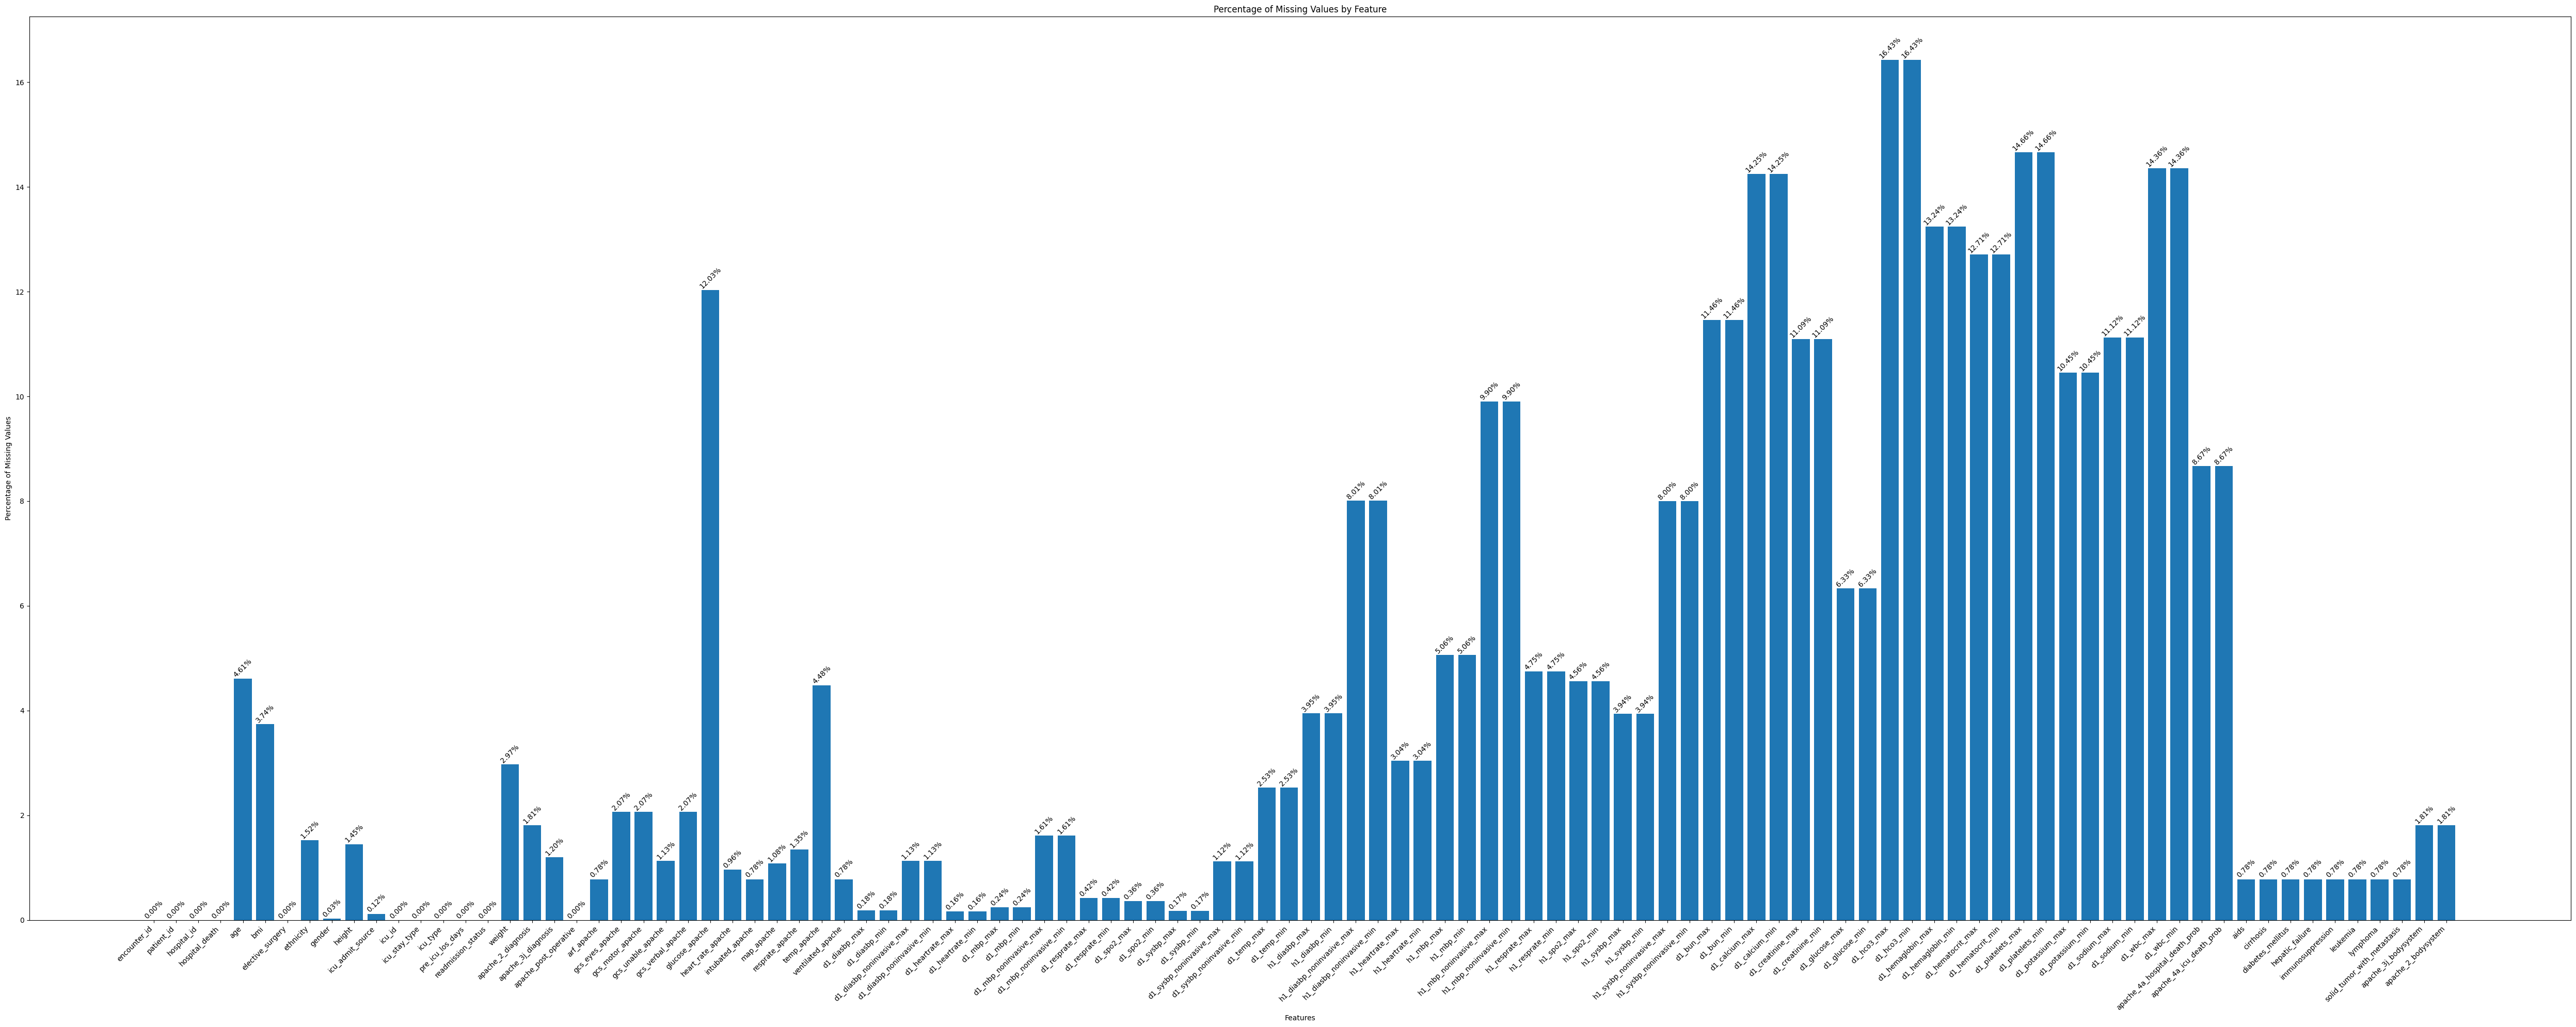

In [8]:
# Read cleaned_data.csv file
df = pd.read_csv('cleaned_data.csv')

# Calculate missing value statistics
missing_values = df.isnull()
missing_count = missing_values.sum()
missing_percentage = (missing_count / len(df)) * 100
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  # 修改此处以保留两位小数
plt.show()


## 2.2 One-Hot Encoding

In [10]:
# One-Hot Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded feature with the numerical feature
df_numeric = df.select_dtypes(exclude=['object'])
df_combined = pd.concat([df_numeric, df_encoded], axis=1)
print("Finished One-Hot Encoding")

Finished One-Hot Encoding


## 2.3 KNNImputer

In [14]:
# KnnImputer usually take more than 20 mintues please be patience.
# The missing values are imputed using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# Save to .csv file
df_imputed.to_csv('cleaned_data_imputed.csv', index=False)
print("The imputed data set is saved to cleaned_data_imputed.csv 文件")

The imputed data set is saved to cleaned_data_imputed.csv 文件


Number of features: 147
Missing value statistics for the imputed data set:
                                            Missing Values Percentage
encounter_id                                             0      0.00%
patient_id                                               0      0.00%
hospital_id                                              0      0.00%
hospital_death                                           0      0.00%
age                                                      0      0.00%
bmi                                                      0      0.00%
elective_surgery                                         0      0.00%
height                                                   0      0.00%
icu_id                                                   0      0.00%
pre_icu_los_days                                         0      0.00%
readmission_status                                       0      0.00%
weight                                                   0      0.00%
apache_2_diagno

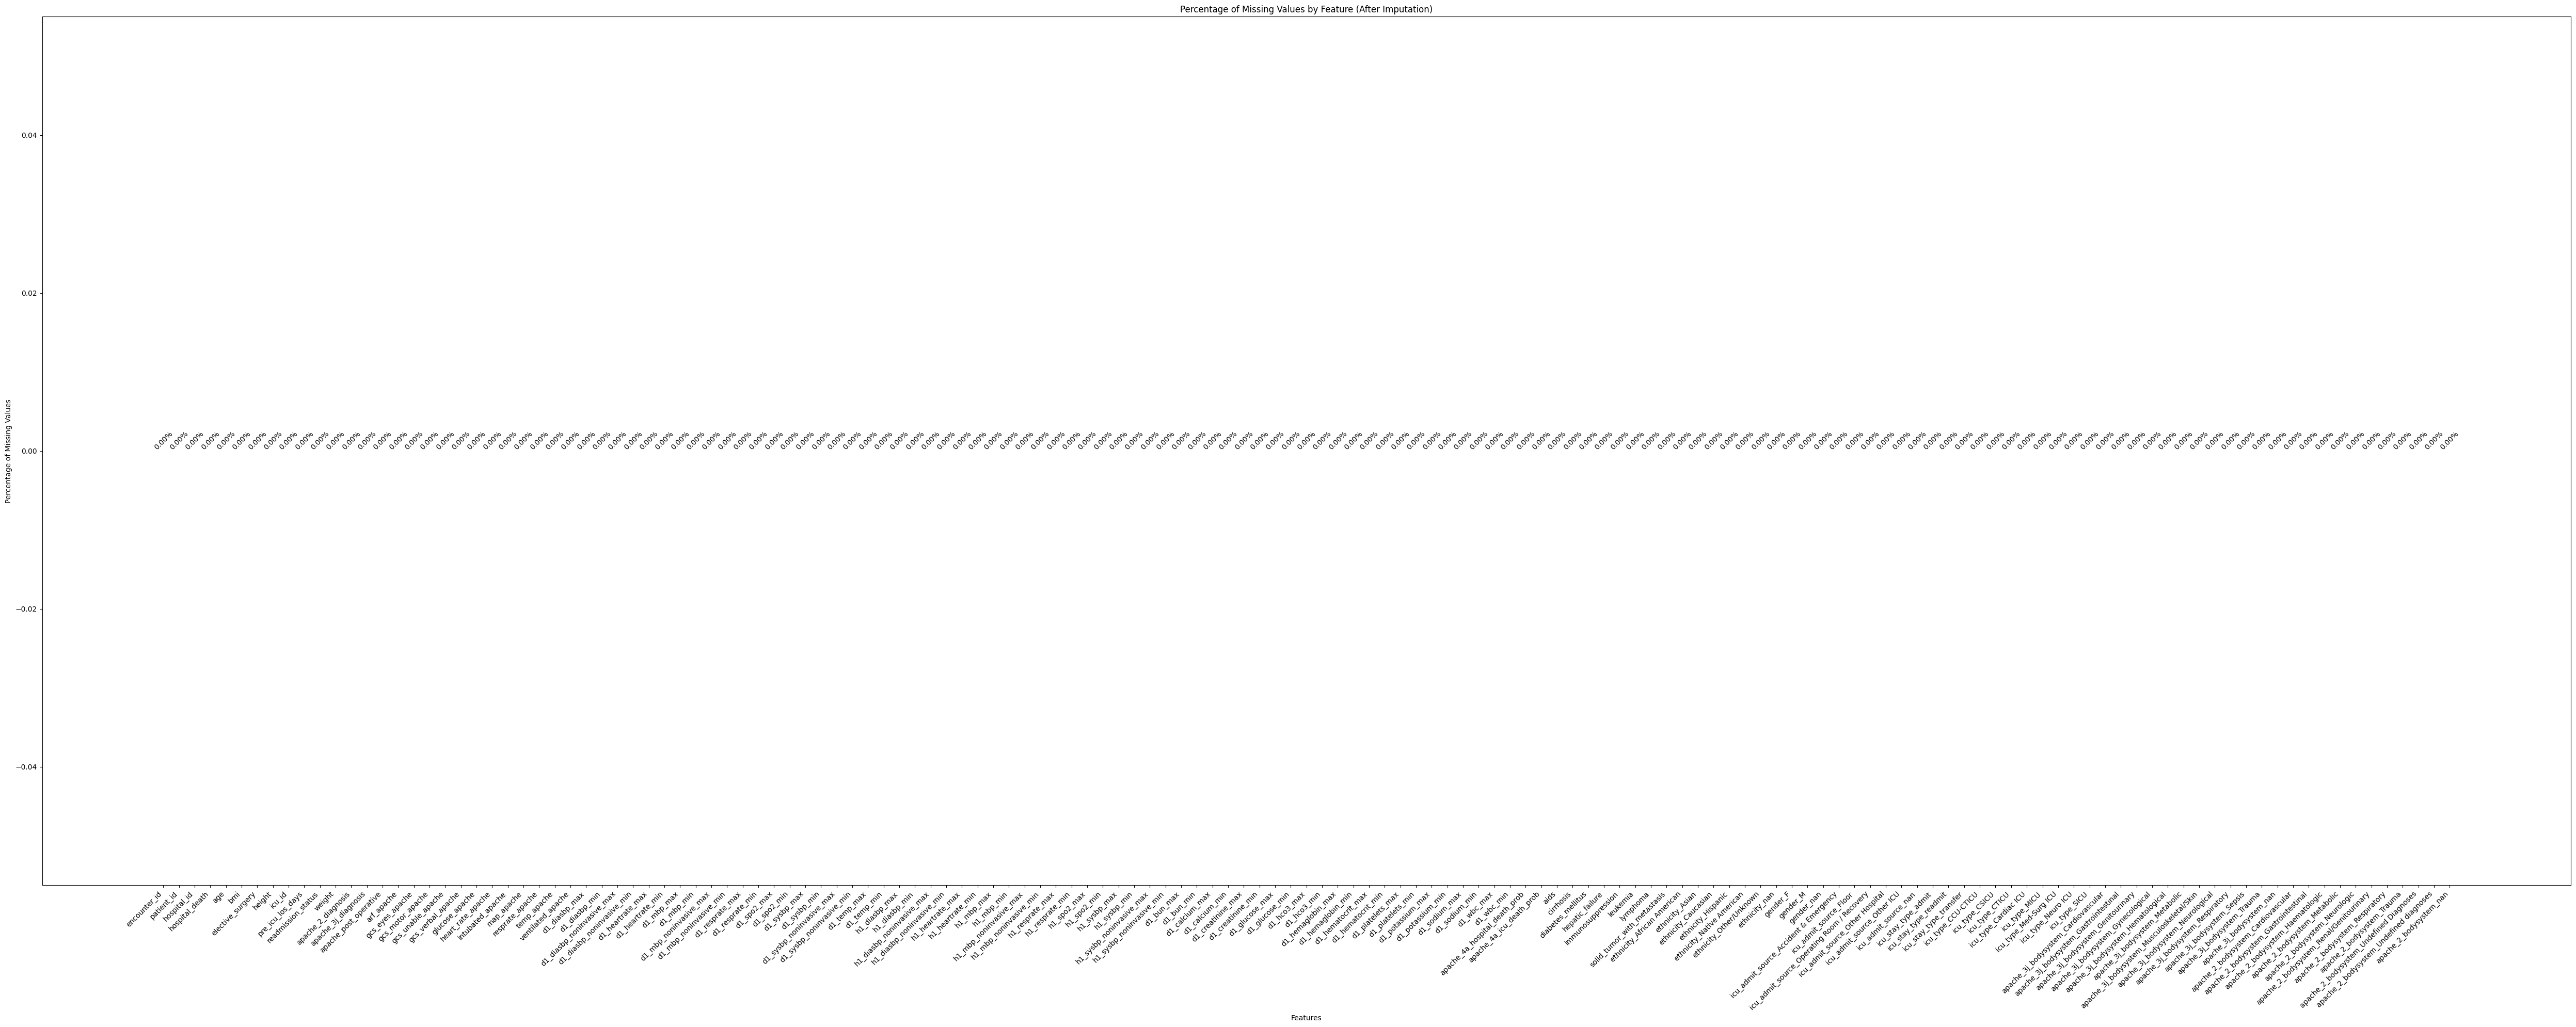

In [22]:
# Read the imputed data set
df_imputed = pd.read_csv('cleaned_data_imputed.csv')

# Statistical feature quantity
num_features = df_imputed.shape[1]
print("Number of features:", num_features)

# Calculates missing value statistics for the imputed data set
missing_values_imputed = df_imputed.isnull()
missing_count_imputed = missing_values_imputed.sum()
missing_percentage_imputed = (missing_count_imputed / len(df_imputed)) * 100
missing_data_info_imputed = pd.DataFrame({'Missing Values': missing_count_imputed, 'Percentage': missing_percentage_imputed})
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics for the imputed data set:")
print(missing_data_info_imputed)

# Visualize
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20)) 
plt.bar(missing_data_info_imputed.index, missing_data_info_imputed['Percentage'])
plt.title('Percentage of Missing Values by Feature (After Imputation)')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info_imputed.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info_imputed['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  
plt.show()


## 2.4 Divide dataset

In [26]:
# Select features manually
# save target variable
y = df_imputed['hospital_death'].copy()
# save APACHE scores for later evaluation on train / test / validation data
y_apache = df_imputed['apache_4a_hospital_death_prob'].copy()
# delate some features and save the rest
X = df_imputed.copy().drop(['hospital_death', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id', # drop identifiers
                    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', # drop APACHE scores
                    'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary', 'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma', 'apache_2_bodysystem_Undefined Diagnoses', 'apache_2_bodysystem_Undefined diagnoses', 'apache_2_bodysystem_nan'], # drop because of similarity with apache_3j_bodysystem
                   axis=1)
print("Finish manually select features")

# Statistical feature quantity
num_features = X.shape[1]
print("Number of features left:", num_features)

Finish manually select features
Number of features left: 129


In [21]:
# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide the test set into test set and validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the partitioned data set shape
print("Training set shapes - Features: {}, Target: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - Features: {}, Target: {}".format(X_test.shape, y_test.shape))
print("Validation set shapes - Features: {}, Target: {}".format(X_val.shape, y_val.shape))

Training set shapes - Features: (73370, 129), Target: (73370,)
Testing set shapes - Features: (9171, 129), Target: (9171,)
Validation set shapes - Features: (9172, 129), Target: (9172,)
